In [1]:
#import data and packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib

In [2]:
data=gpd.read_file('final/noe_oebo_points2.geojson')

In [3]:
data.replace({'ASP':'CAS'},inplace=True)

In [4]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [5]:
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')
no_data=BLs.set_index('BL').loc[['Burgenland','Vorarlberg','Wien']]

In [6]:
mountains=gpd.read_file( r'C:\Users\fabrizio\Documents\uni\GIS\input\height_model/hoehst_will.shp')
mountains=mountains.to_crs(data.crs)
terrain_dissolved=mountains.dissolve('GRIDCODE')

In [7]:
def get_colors(string):
    colors=string.strip().split(', ')
    print(colors)
    return colors
sample='#6a00ff, #ff00ff, #ff0040, #ff9500, #ffff00, #aaff00, #00ff15, #00ffff, #0095ff'

get_colors(sample)

['#6a00ff', '#ff00ff', '#ff0040', '#ff9500', '#ffff00', '#aaff00', '#00ff15', '#00ffff', '#0095ff']


['#6a00ff',
 '#ff00ff',
 '#ff0040',
 '#ff9500',
 '#ffff00',
 '#aaff00',
 '#00ff15',
 '#00ffff',
 '#0095ff']

['#e03524', '#f07c12', '#ffc200', '#90bc1a', '#21b534', '#0095ac', '#1f64ad', '#4040a0', '#903498']


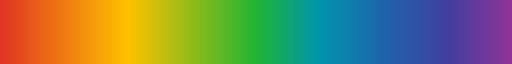

In [8]:
sample='#e03524, #f07c12, #ffc200, #90bc1a, #21b534, #0095ac, #1f64ad, #4040a0, #903498'
#sample='#0a0c08, #842bd7, #ff206e, #fbff12, #41ead4, #2fff00, #ff0202, #ff6700, #ffffff'
decades_colors=get_colors(sample)
cmap_decades = matplotlib.colors.LinearSegmentedColormap.from_list("", decades_colors)
cmap_decades

In [51]:
# configure plotting environment
xmin, ymin, xmax, ymax = data.geometry.total_bounds

# get custom cmaps
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
color_list.reverse()

colors_tech=['#0c1b2b', '#32cbcb','#5c7aff', '#fb232e', '#dbf679', '#808080' ]
cmap_tech = matplotlib.colors.LinearSegmentedColormap.from_list("", colors_tech)

terrain_labels=[
'lowland (110 - 350)',
'hilly land (351 - 500)',
'submontane (501-700)',
'mid-montane (701-1000)',
'high montane (1001 -1300)',
'lower subalpine (1301 - 1600)',
'subalpine (1601-1900)',
'alpine (> 1901)']

both=color_list+colors_tech
cmap_both = matplotlib.colors.LinearSegmentedColormap.from_list("", both)


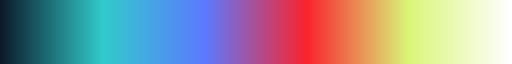

In [10]:
cmap_tech


In [11]:
simplified=data
simplified.loc[simplified.tech_type=='MBR', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='RBC', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='Filtration', 'tech_type']='Primary'
simplified.loc[simplified.tech_type=='TRF', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='BKF', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='Fest', 'tech_type']='Other'
simplified.loc[simplified.tech_type=='ASP', 'tech_type']='CAS'


simplified.tech_type.value_counts()

SBR        3216
CW         1370
CAS        1077
Primary     544
Other       362
nd          195
Name: tech_type, dtype: int64

In [12]:
missing_dist=basemap[basemap.PB=='Amstetten'].dissolve('PB')


In [13]:
fontsize_colorbar=17
fontsize_cmap=fontsize_colorbar-2

Text(1.042, 0.04, 'no data')

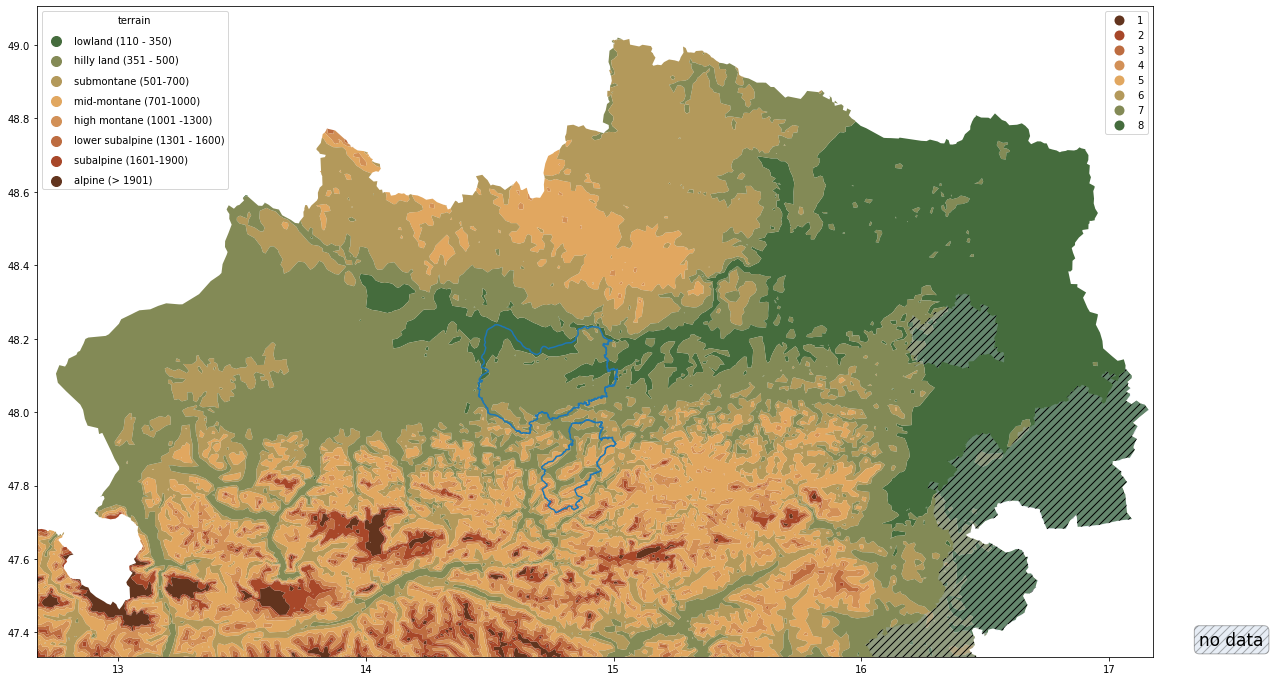

In [14]:

fig,ax=plt.subplots(1,figsize=(20,30))

mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=True)
for value,color in zip(list(terrain_labels),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1, title='terrain',bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)
missing_dist.geometry.boundary.plot(ax=ax)

no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=fontsize_colorbar,verticalalignment='top',bbox=props,transform=ax.transAxes)


In [64]:
title_terrain='topographic category,altitude (m.s.l.)'
tech_labels=['CAS','CW','Other','Primary','SBR','no data']

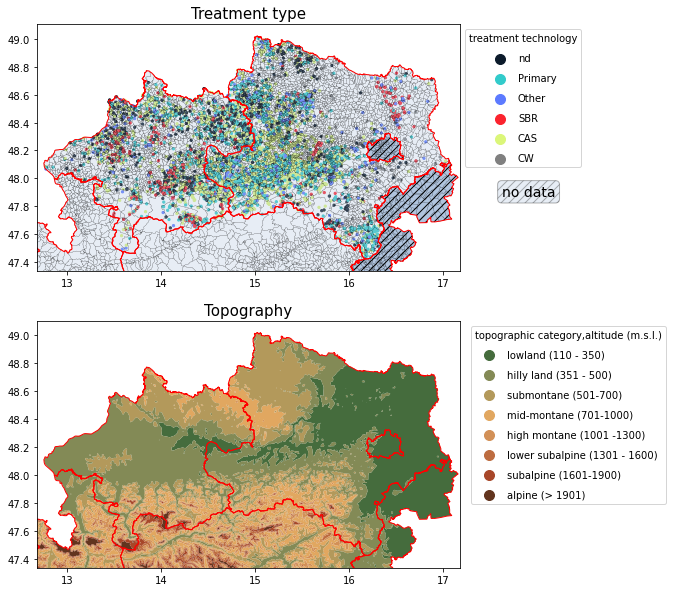

In [95]:
#plot for freq
fig,ax=plt.subplots(2,1,figsize=(10,10))

#titles
ax[0].set_title('Treatment type', fontsize=15)
ax[1].set_title('Topography', fontsize=15)

#TOP
simplified.plot(ax=ax[0],categorical=True,column='tech_type', markersize=5, cmap=cmap_tech, legend=True )
tech_label=simplified.tech_type.unique()
basemap.plot(color='lightsteelblue',ax=ax[0], alpha=0.3)
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[0])
no_data.plot(hatch='///',ax=ax[0],alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
ax[0].text(1.1,0.35, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax[0].transAxes)
#legend
for value,color in zip(list(tech_label),colors_tech):
    ax[0].scatter([],[],c=color,s=100, label=value)
ax[0].legend(scatterpoints=1,loc='upper right', labelspacing=1, title='treatment technology',bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.3, 1])

#BOTTOM
mountains.plot(column='GRIDCODE',ax=ax[1],categorical=True, cmap=cmap, legend=False)
#legend
for value,color in zip(list(terrain_labels),color_list):
    ax[1].scatter([],[],c=color,s=100, label=value)
ax[1].legend(scatterpoints=1,loc='upper right', labelspacing=1, title=title_terrain,bbox_transform=ax[1].transAxes, bbox_to_anchor=[1.5, 1])

#BOTH
for axe in ax:
    axe.set_xlim(xmin-0.1,xmax+0.15)
    axe.set_ylim(ymin-0.1,ymax+0.1)
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)




plt.savefig('plots/tech_topo_both.png', bbox_inches='tight' )

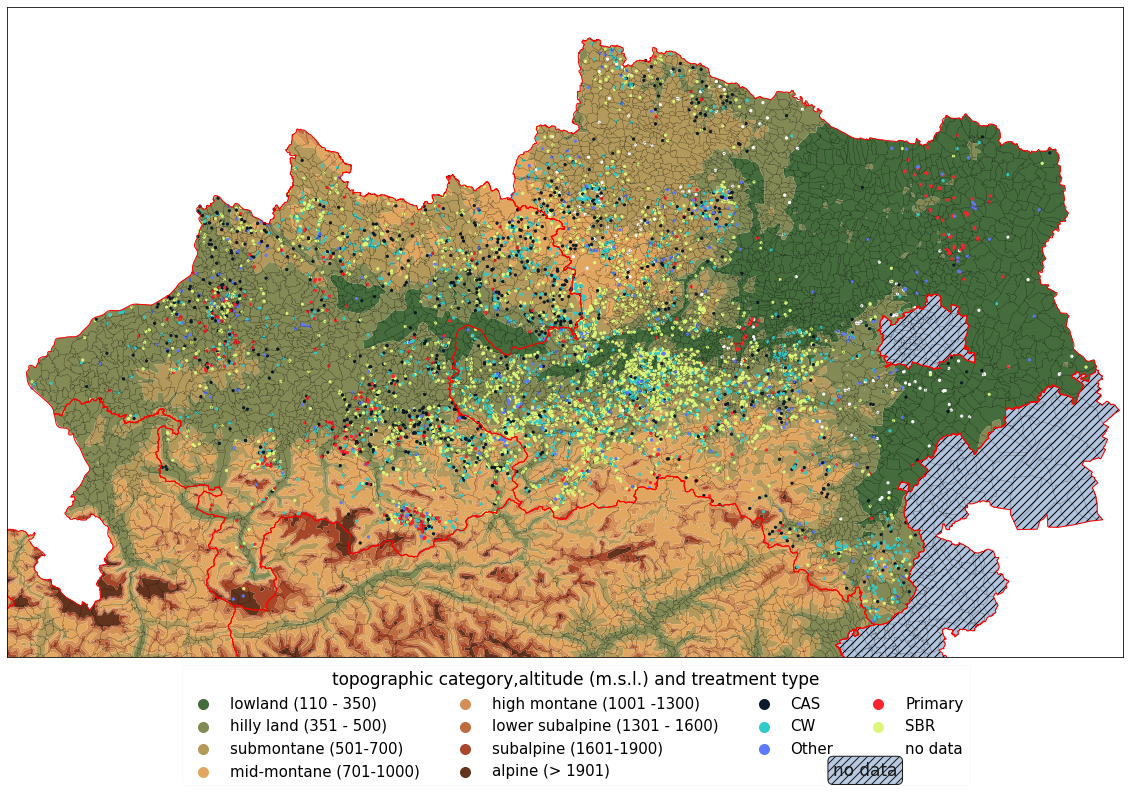

In [40]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=False)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)


#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

for value,color in zip(list(terrain_labels+tech_labels),both):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left',fontsize=15,title_fontsize=17,ncol=4 ,
title=title_terrain,bbox_transform=ax.transAxes, bbox_to_anchor=[0.15, 0],framealpha=0.1)
simplified.plot(ax=ax,categorical=True,column='tech_type', markersize=5, cmap=cmap_tech )

ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

no_data.plot(hatch='///',ax=ax,alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=1, hatch='///')
fig.text(0.74,-0.16, 'no data', fontsize=fontsize_colorbar,verticalalignment='top',bbox=props,transform=ax.transAxes)


plt.savefig('plots/topo_points_tech.png', bbox_inches='tight' )

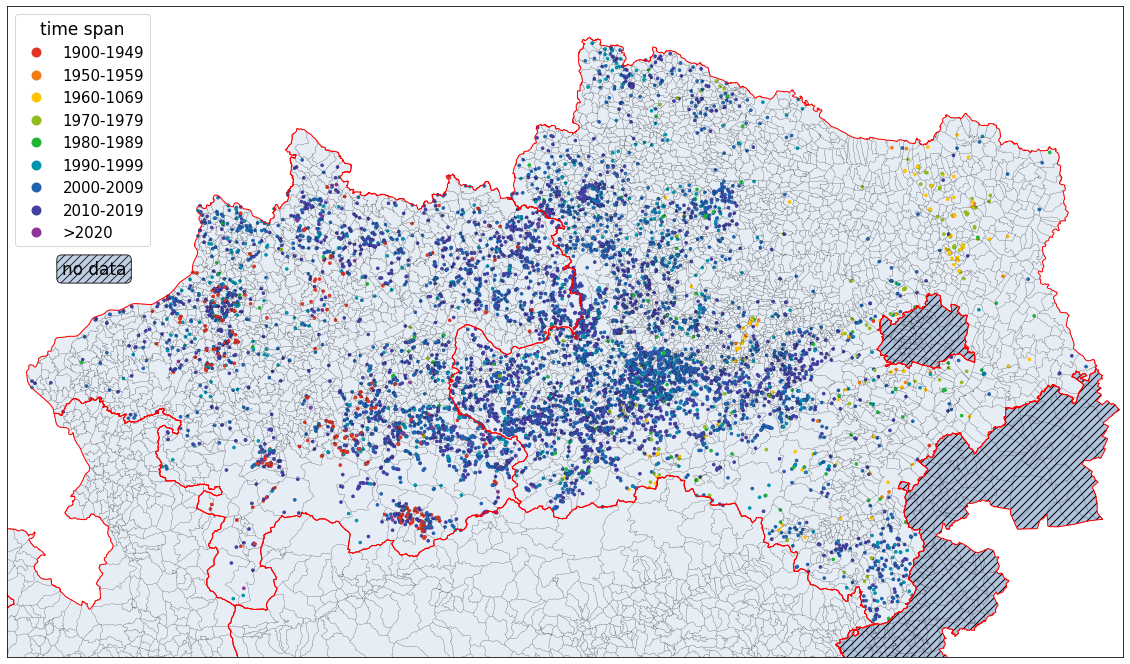

In [17]:
fig,ax=plt.subplots(1,figsize=(20,30))

basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

data.plot(ax=ax,column='year',legend=True,scheme="User_Defined", cmap=cmap_decades,
markersize=7, classification_kwds=dict(bins=[1949,1959,1969,1979,1989,1999,2009,2019]),
legend_kwds={'fontsize':fontsize_cmap,'labels':['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019', '>2020'],
'title':'time span','title_fontsize':fontsize_colorbar} )#


ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

no_data.plot(hatch='///',ax=ax,alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.8, hatch='///')
fig.text(0.049,0.61, 'no data', fontsize=fontsize_colorbar,verticalalignment='top',bbox=props,transform=ax.transAxes)


plt.savefig('plots/decades.png', bbox_inches='tight' )

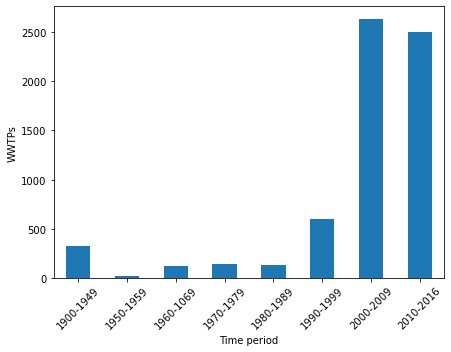

In [94]:
simplified['time period']=pd.cut(simplified.year, [1900,1949,1959,1969,1979,1989,1999,2009,2016],
labels=['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2016'])
categories=simplified.groupby('time period').count().reset_index()
fig, ax= plt.subplots(1, figsize=(7,5))

categories.plot.bar(y='PE',x='time period',stacked=True,legend=False,ax=ax)
plt.xticks(rotation=45)
plt.ylabel('WWTPs')
plt.xlabel('Time period')

plt.savefig('graphs/decades.png', bbox_inches='tight' )

In [98]:
to_plot=data
to_plot.loc[to_plot.no_nitri=='true','no_nitri']='only primary treatment'
to_plot.loc[to_plot.no_nitri=='false','no_nitri']='primary and secondary treatment'
to_plot.loc[to_plot.no_nitri=='nd','no_nitri']='no data'

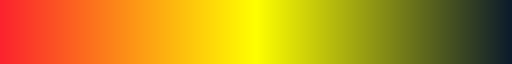

In [99]:
colors_tech=['#fb232e','#FFFF00',  '#0c1b2b']
both2=color_list+colors_tech
cmap_tech2 = matplotlib.colors.LinearSegmentedColormap.from_list("", colors_tech)
cmap_tech2

KeyboardInterrupt: 

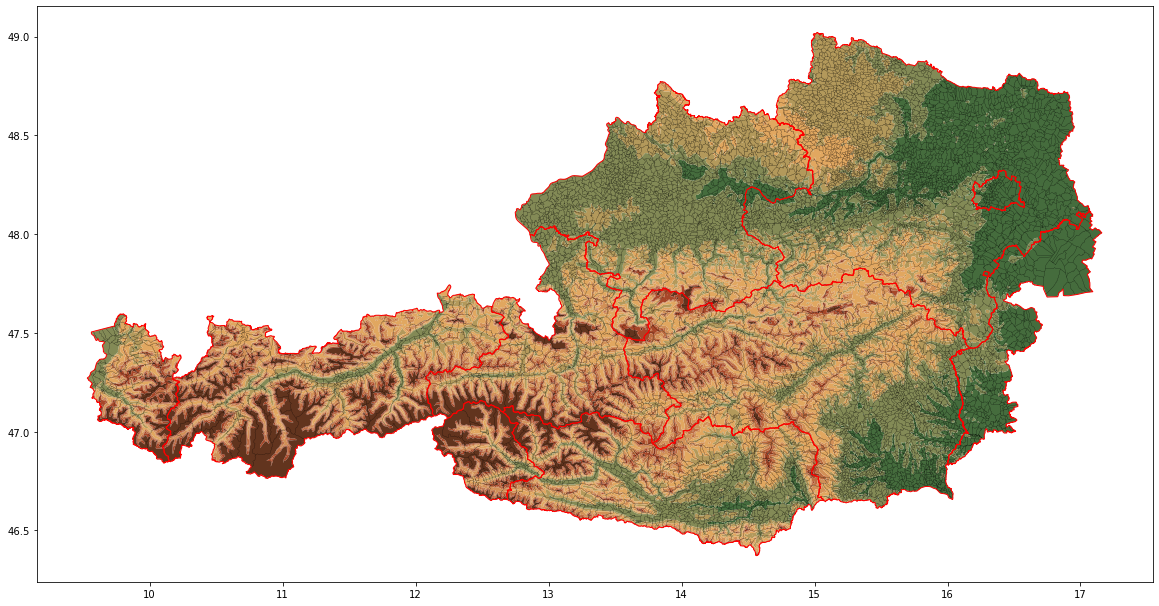

In [100]:
fig,ax=plt.subplots(1,figsize=(20,30))
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)

mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=False)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

title_terrain='topographic category,altitude (m.s.l.) and treatment type'

category_labels=['no data','only primary treatment','primary and secondary treatment']

for value,color in zip(list(terrain_labels+category_labels),both2):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,ncol=3,fontsize=15,framealpha=0.3,title_fontsize=17,loc='upper left',labelspacing=1, title=title_terrain,bbox_transform=ax.transAxes, bbox_to_anchor=[0.15, 0])
to_plot.plot(ax=ax,categorical=True,column='no_nitri',legend=False, markersize=3, cmap=cmap_tech2)
#legend_kwds={'labels':['primary and secondary treatment','no data', 'only primary treatment']})
#data[data.no_nitri=='only primary treatment'].plot(ax=ax,categorical=True,column='no_nitri',legend=True, markersize=3, cmap=cmap_tech2)

no_data.plot(hatch='///',ax=ax,alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.8, hatch='///')
fig.text(0.679,-0.21, 'no data', fontsize=fontsize_colorbar,verticalalignment='top',bbox=props,transform=ax.transAxes)


ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_nitri.png', bbox_inches='tight' )

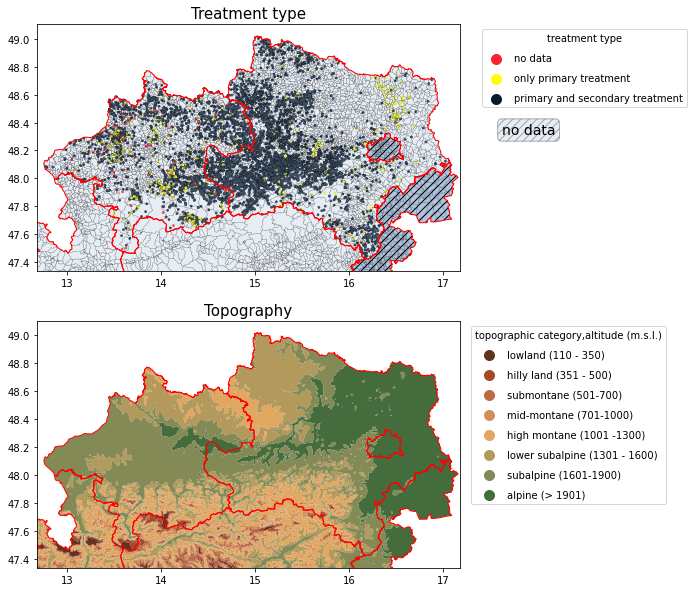

In [109]:
#plot for freq
fig,ax=plt.subplots(2,1,figsize=(10,10))

#titles
ax[0].set_title('Treatment type', fontsize=15)
ax[1].set_title('Topography', fontsize=15)

#TOP
to_plot.plot(ax=ax[0],categorical=True,column='no_nitri',legend=False, markersize=3, cmap=cmap_tech2)

basemap.plot(color='lightsteelblue',ax=ax[0], alpha=0.3)
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[0])
no_data.plot(hatch='///',ax=ax[0],alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
ax[0].text(1.1,0.6, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax[0].transAxes)
#legend
category_labels=['no data','only primary treatment','primary and secondary treatment']

for value,color in zip(list(category_labels),colors_tech):
    ax[0].scatter([],[],c=color,s=100, label=value)
ax[0].legend(scatterpoints=1,loc='upper right', labelspacing=1, title='treatment type',bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.55, 1])

#BOTTOM
mountains.plot(column='GRIDCODE',ax=ax[1],categorical=True, cmap=cmap, legend=False)
#legend
for value,color in zip(list(terrain_labels),color_list):
    ax[1].scatter([],[],c=color,s=100, label=value)
ax[1].legend(scatterpoints=1,loc='upper right', labelspacing=1, title=title_terrain,bbox_transform=ax[1].transAxes, bbox_to_anchor=[1.5, 1])

#BOTH
for axe in ax:
    axe.set_xlim(xmin-0.1,xmax+0.15)
    axe.set_ylim(ymin-0.1,ymax+0.1)
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)




plt.savefig('plots/type_topo_both.png', bbox_inches='tight' )

In [ ]:
data=geopandas.read_file('final/complete.geojson')
data.columns

Index(['id', '%PE_nonitri_medium', '%PE_nonitri_small', '%PE_nonitri_tot',
       '%no_nitri_medium', '%no_nitri_small', '%no_nitri_tot', 'BL', 'GKZ',
       'KG', 'PE_nonitri_medium', 'PE_nonitri_small', 'PE_nonitri_tot',
       'freq_medium', 'freq_small', 'freq_tot', 'no_nitri_medium',
       'no_nitri_small', 'no_nitri_tot', 'sum_PE_medium', 'sum_PE_small',
       'sum_PE_tot', 'geometry'],
      dtype='object')

In [ ]:
# get custom cmaps
color_list=['#0000FF','#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
terrain_labels2=terrain_labels
print(terrain_labels2)

['lowland (110 - 350)', 'hilly land (351 - 500)', 'submontane (501-700)', 'mid-montane (701-1000)', 'high montane (1001 -1300)', 'lower subalpine (1301 - 1600)', 'subalpine (1601-1900)', 'alpine (> 1901)']


In [ ]:
pop1000=gpd.read_file('final/pop1000.gpkg/pop1000.shp')

8.098743008126592

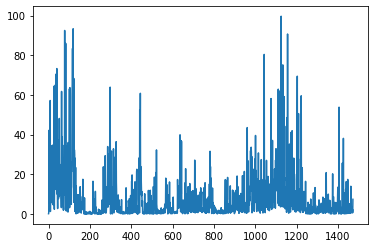

In [ ]:
pop1000.per1000peo.plot()
pop1000.per1000peo.mean()

In [ ]:
import matplotlib as mpl
num_colors = 9
cm = mpl.cm.get_cmap(name='Blues')
currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
currentColors
cmap_blues = matplotlib.colors.LinearSegmentedColormap.from_list("", currentColors)
cmap_blues

c=np.array([currentColors])



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

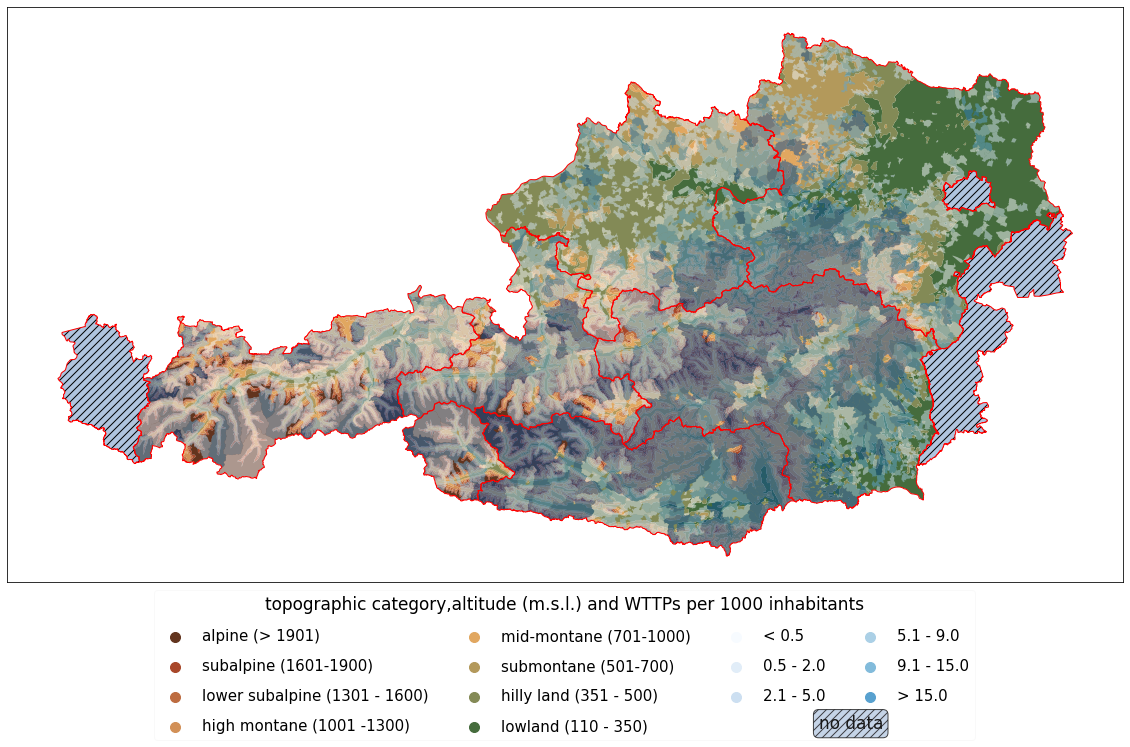

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
color_list=['#62341e', '#a84729', '#bd6c40', '#d29057', '#e1a760', '#b3995b', '#848a56', '#456c3d']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)
#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


legend_lab=['< 0.5','0.5 - 2.0','2.1 - 5.0','5.1 - 9.0','9.1 - 15.0','> 15.0']
terrain_labels.reverse()

no_data.plot(hatch='///',ax=ax,alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.8, hatch='///')
fig.text(0.727,-0.23, 'no data', fontsize=fontsize_colorbar,verticalalignment='top',bbox=props,transform=ax.transAxes)


for value,color in zip(terrain_labels+legend_lab,color_list+currentColors):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1,title_fontsize=fontsize_colorbar,
fontsize=fontsize_cmap,title='topographic category,altitude (m.s.l.) and WTTPs per 1000 inhabitants',
bbox_transform=ax.transAxes,ncol=4, bbox_to_anchor=[0.125, 0],framealpha=0.1)
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',alpha=0.5,ax=ax,scheme="User_Defined",
classification_kwds=dict(bins=[0.5, 2,5,9,15]),legend=False,cmap=cmap_blues)


plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_freq.png', bbox_inches='tight' )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

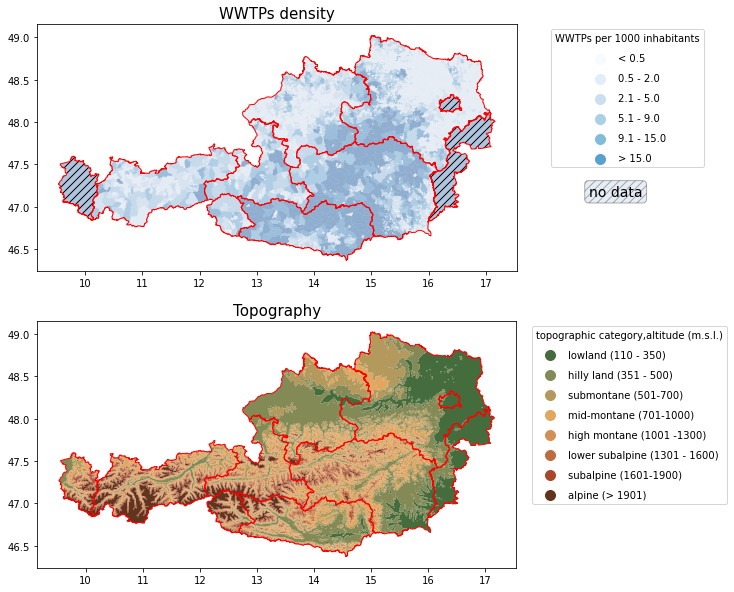

In [ ]:
#plot for freq
fig,ax=plt.subplots(2,1,figsize=(10,10))

#titles
ax[0].set_title('WWTPs density', fontsize=15)
ax[1].set_title('Topography', fontsize=15)

#TOP
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',alpha=0.5,ax=ax[0],scheme="User_Defined",
classification_kwds=dict(bins=[0.5, 2,5,9,15]),legend=False,cmap=cmap_blues)
basemap.plot(color='lightsteelblue',ax=ax[0], alpha=0.3)
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax[0])
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[0])
no_data.plot(hatch='///',ax=ax[0],alpha=1,color='lightsteelblue')
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
ax[0].text(1.15,0.35, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax[0].transAxes)
#legend
legend_lab=['< 0.5','0.5 - 2.0','2.1 - 5.0','5.1 - 9.0','9.1 - 15.0','> 15.0']

for value,color in zip(list(legend_lab),currentColors):
    ax[0].scatter([],[],c=color,s=100, label=value)
ax[0].legend(scatterpoints=1,loc='upper right', labelspacing=1, title='WWTPs per 1000 inhabitants',bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.4, 1])

#BOTTOM
mountains.plot(column='GRIDCODE',ax=ax[1],categorical=True, cmap=cmap, legend=False)
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax[1])

#legend
for value,color in zip(list(terrain_labels),color_list):
    ax[1].scatter([],[],c=color,s=100, label=value)
ax[1].legend(scatterpoints=1,loc='upper right', labelspacing=1, title=title_terrain,bbox_transform=ax[1].transAxes, bbox_to_anchor=[1.45, 1])





plt.savefig('plots/density_topo_both.png', bbox_inches='tight' )

In [ ]:
data.plot(ax=ax,column='year',legend=True,scheme="User_Defined", cmap=cmap_decades,
markersize=7, classification_kwds=dict(bins=[1949,1959,1969,1979,1989,1999,2009,2019]),
legend_kwds={'labels':['1900-1949','1950-1959','1960-1069','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019', '>2020']} )#


KeyError: 'year'

<AxesSubplot:>

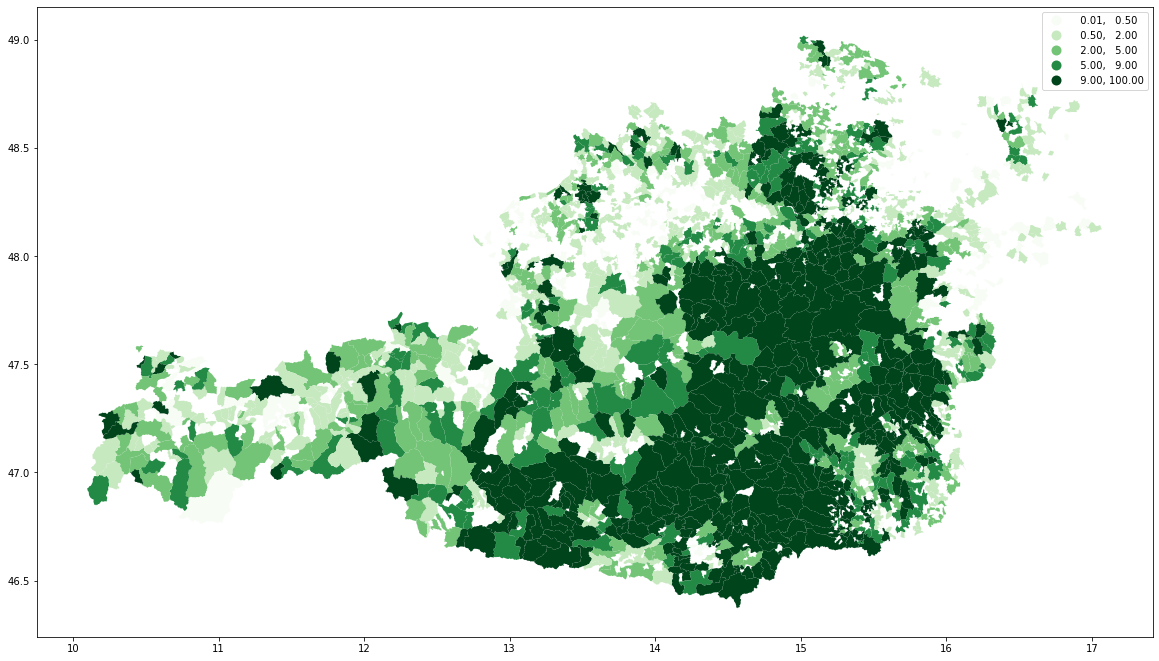

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
pop1000[pop1000.per1000peo>0.0].plot(column='per1000peo',ax=ax,scheme="User_Defined",classification_kwds=dict(bins=[0.5,2,5,9,100]),
 alpha=1,legend=True,cmap='Greens')  #,legend_kwds={'shrink': 0.25}


In [ ]:
def count_per_unit(data, column):
    look=data.groupby(['BEZIRK',column]).count()['PE'].reset_index()
    look=look[look.no_nitri=='only primary treatment'].sort_values('PE',ascending=False)
    return look

In [ ]:
look=simplified.groupby(['BEZIRK','time period']).count()['PE'].reset_index()
look[look['time period']<'1980-1989'].sort_values('PE',ascending=False).head(10)


BEZIRK time period  PE
99              Mistelbach   1970-1979  46
98              Mistelbach   1960-1069  43
171          Wien Umgebung   1970-1979  17
123               Scheibbs   1970-1979  17
138       St. Pölten-Stadt   1960-1069  16
83              Lilienfeld   1970-1979  12
82              Lilienfeld   1960-1069  11
122               Scheibbs   1960-1069  11
155  Waidhofen a. d. Thaya   1970-1979   6
91                    Melk   1970-1979   6

In [ ]:
simplified[simplified.year<1989].groupby('BEZIRK').count().sort_values('BL',ascending=False).head(10)

BL  NAME  PE  bautyp  id  no_nitri  tech_type  year  \
BEZIRK                                                                   
Mistelbach         95    95  95      95  95        95         95    95   
Scheibbs           38    38  38      38  38        38         38    38   
Lilienfeld         36    36  36      36  36        36         36    36   
Wien Umgebung      30    30  28      30  30        30         30    30   
Melk               26    26  26      26  26        26         26    26   
St. Pölten-Stadt   25    25  25      25  25        25         25    25   
Neunkirchen        14    14  14      14  14        14         14    14   
Baden              13    13  13      13  13        13         13    13   
Wr. Neustadt-Land  13    13  13      13  13        13         13    13   
Amstetten          13    13  13      13  13        13         13    13   

                   geometry  time period  
BEZIRK                                    
Mistelbach               95           95  
Scheibbs                 38           38  
Lilienfeld               36           36  
Wien Umgebung            30           30  
Melk                     26           26  
St. Pölten-Stadt         25           25  
Neunkirchen              14           14  
Baden                    13           13  
Wr. Neustadt-Land        13           13  
Amstetten                13           13

In [ ]:
simplified[simplified.year<1950].groupby('BL').count()

BEZIRK  NAME   PE  bautyp  id  no_nitri  tech_type  year  \
BL                                                                        
Lower-Austria       2     2    1       2   2         2          2     2   
Upper-Austria       0   325  325     302   0       325        325   325   

               geometry  time period  
BL                                    
Lower-Austria         2            2  
Upper-Austria       325          325

In [ ]:
data.no_nitri.value_counts()
look=data.groupby(['BEZIRK','no_nitri']).count()['PE'].reset_index()
look[look.no_nitri=='only primary treatment'].sort_values('PE',ascending=False).head(5)


AttributeError: 'GeoDataFrame' object has no attribute 'no_nitri'

In [ ]:
mi=data.year.unique().min()
ma=data.year.unique().max()


# plotting every 10 years. nitrification by color

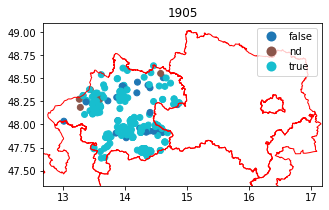

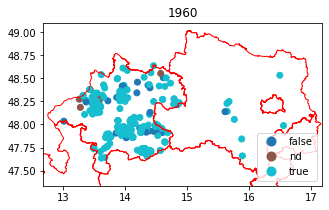

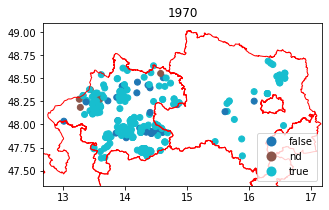

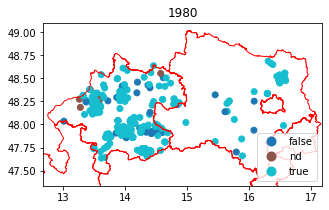

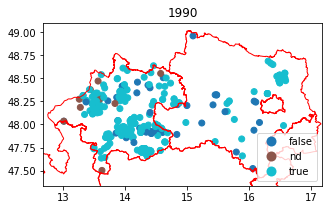

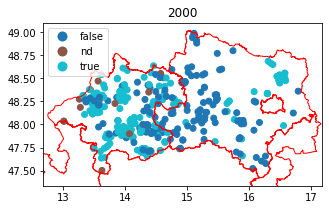

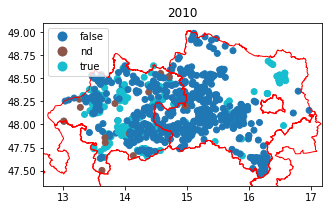

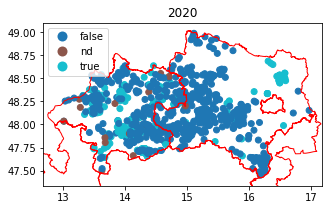

In [ ]:
final=gpd.GeoDataFrame()
for i in sorted(list(data.year.unique()))[::10]:
    fig,ax=plt.subplots(1,figsize=(5,15))
    mergetemp=data[data.year==i]
    final=gpd.GeoDataFrame(pd.concat([final,mergetemp], ignore_index=True), crs=final.crs)
    final.plot(column='no_nitri',ax=ax, legend=True)#,legend_kwds={'shrink': 0.10})    
    #plot KG boundaries
    #basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1,ax=ax)
    ax.set_xlim(xmin-0.1,xmax+0.15)
    ax.set_ylim(ymin-0.1,ymax+0.1)
    ax.set_title(i)


In [ ]:
small=simplified[simplified.PE<51]

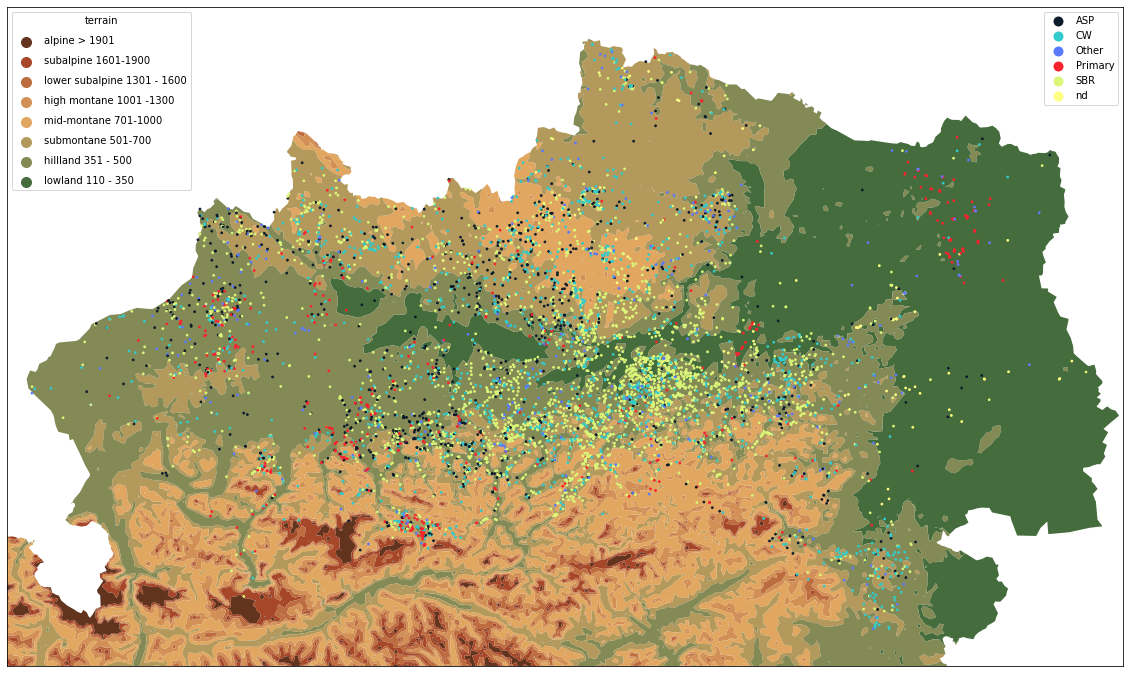

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,30))
mountains.plot(column='GRIDCODE',ax=ax,categorical=True, cmap=cmap, legend=True)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
#BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#terrain_dissolved.geometry.boundary.plot(ax=ax,linewidth=0.1, edgecolor='r')

for value,color in zip(list(reversed(terrain_labels)),color_list):
    plt.scatter([],[],c=color,s=100, label=value)
fig.legend(scatterpoints=1,loc='upper left', labelspacing=1, title='terrain',bbox_transform=ax.transAxes, bbox_to_anchor=[0, 1])
small.plot(ax=ax,categorical=True,column='tech_type',legend=True, markersize=3, cmap=cmap_tech)
#missing_dist.geometry.boundary.plot(ax=ax)


ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.savefig('plots/topo_points_tech.png', bbox_inches='tight' )

# plot development of medium non nitrifying

IndexError: index 0 is out of bounds for axis 0 with size 0

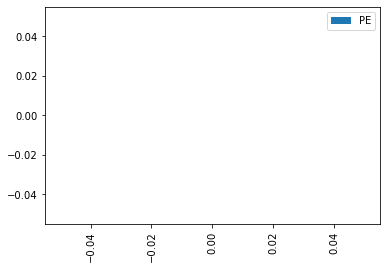

In [ ]:
medium=data[data.PE>50]
to_plot=medium.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')


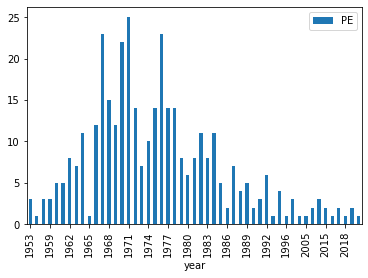

In [ ]:
small=data[(data.PE<50)&(data.year>1905)]
to_plot=small.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)


IndexError: index 0 is out of bounds for axis 0 with size 0

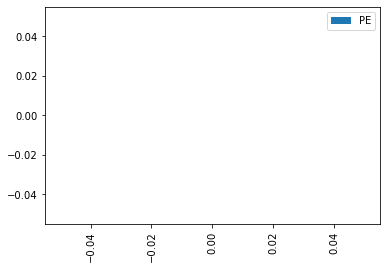

In [ ]:
data=data[(data.year>1905)]
to_plot=data.groupby(['year','no_nitri']).count().reset_index()
to_plot[to_plot.no_nitri=='1'].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)


In [15]:
data.groupby(['BL','bautyp']).count()

BEZIRK  NAME    PE    id  no_nitri  tech_type  year  \
BL            bautyp                                                           
Lower-Austria Bio          3789  3789  3789  3789      3789       3789  3789   
              Mech          283   283   282   283       283        283   283   
              Unbekannt      59    59    57    59        59         59    59   
Upper-Austria Bio             0  2167  2167     0      2167       2167  2167   
              Mech            0   310   310     0       310        310   310   

                         geometry  
BL            bautyp               
Lower-Austria Bio            3789  
              Mech            283  
              Unbekannt        59  
Upper-Austria Bio            2167  
              Mech            310

In [18]:
data[(data.BL=='Lower-Austria')&(NO=j[(j.BL_left=='Lower-Austria')&(j.no_nitri=='true')])]

BEZIRK             BL  \
1                 Baden  Lower-Austria   
7                 Baden  Lower-Austria   
11                Baden  Lower-Austria   
13                Baden  Lower-Austria   
35                 Horn  Lower-Austria   
...                 ...            ...   
3657  Wr. Neustadt-Land  Lower-Austria   
3658  Wr. Neustadt-Land  Lower-Austria   
3782             Zwettl  Lower-Austria   
3783             Zwettl  Lower-Austria   
3784             Zwettl  Lower-Austria   

                                                   NAME     PE bautyp    id  \
1              ARA Wohnhaus Asmus KG Glashütten 1479 BN    4.0   Mech     1   
7                    ARA Eder Johann und Helene 2429 BN   35.0   Mech     7   
11                         ARA Lewy Nissen u.a. 1191 BN   90.0   Mech    11   
13    ARA Pottendorfer Spinnerei und Felixdorfer Web...  280.0   Mech    13   
35                                ARA Leitinger 1037 HO    5.0   Mech    35   
...                                                 ...    ...    ...   ...   
3657        ARA Wagner Theresia, Bachler Walter 3051 WB   13.0   Mech  3657   
3658       ARA Gasthaus Geishofer KG Gutenstein 3154 WB   22.0   Mech  3658   
3782                         ARA AWG Schoberhof 4599 ZT   12.0   Mech  3782   
3783            ARA AWG Neuwald KG Oberneustift 4881 ZT   20.0   Mech  3783   
3784                      ARA AWG Pfaffenschlag 4587 ZT   20.0   Mech  3784   

     no_nitri tech_type  year                   geometry  
1        true        nd  1968  POINT (16.05348 48.06096)  
7        true        nd  1984  POINT (16.52394 47.99057)  
11       true        nd  1960  POINT (16.55562 47.98838)  
13       true        nd  1938  POINT (16.39305 47.90914)  
35       true        nd  1982  POINT (15.64009 48.77876)  
...       ...       ...   ...                        ...  
3657     true   Primary  1962  POINT (16.15558 47.83376)  
3658     true   Primary  1962  POINT (15.85173 47.89251)  
3782     true   Primary  2001  POINT (15.36674 48.40515)  
3783     true   Primary  2003  POINT (15.07112 48.58325)  
3784     true   Primary  2001  POINT (15.28157 48.45822)  

[283 rows x 10 columns]

In [24]:
data.no_nitri.unique()

array(['false', 'true', 'nd'], dtype=object)

In [26]:
#data[(data.BL=='Upper-Austria')&(data.no_nitri=='true')]

In [33]:
j=geopandas.sjoin(data,basemap,how='left')

In [45]:
OO=j[(j.BL_left=='Upper-Austria')&(j.no_nitri=='true')]
OO=OO.groupby(['PB']).count().sort_values('PE',ascending=False).reset_index()

In [50]:
OO['%tot']=OO.PE/OO.PE.sum()*100
OO[['PB','%tot']]

PB       %tot
0         Kirchdorf  43.413174
1              Ried  17.365269
2           Gmunden   9.281437
3        Steyr-Land   8.383234
4          Eferding   3.892216
5              Perg   2.994012
6          Rohrbach   2.994012
7         Linz-Land   2.694611
8         Schärding   2.694611
9         Freistadt   2.395210
10          Braunau   0.898204
11     Grieskirchen   0.898204
12  Urfahr-Umgebung   0.898204
13        Wels-Land   0.898204
14       Stadt Wels   0.299401

In [30]:
NO=j[(j.BL_left=='Lower-Austria')&(j.no_nitri=='true')]
NO.groupby(['BEZIRK']).sum().sort_values('PE',ascending=False)

PE    year  index_right  MERIDIAN        GKZ  \
BEZIRK                                                                    
Mistelbach             1430.0  179152     348489.0    3094.0  2878338.0   
Lilienfeld              815.0   53320     111860.0     918.0   848077.0   
Krems-Land              772.0   17807      32157.0     306.0   281918.0   
St. Pölten-Stadt        697.0   45169      95341.0     782.0   694623.0   
Baden                   498.0   13742      26497.0     238.0   214311.0   
Scheibbs                393.0   73082     184673.0    1258.0  1184264.0   
Neunkirchen             331.0   15770      33653.0     272.0   254555.0   
Mödling                 290.0    9878      13675.0     170.0   158571.0   
Wien Umgebung           280.0   37364      90140.0     646.0   607149.0   
Melk                    280.0   47603      85905.0     816.0   756795.0   
Korneuburg              100.0    2014       1032.0      34.0    31229.0   
Amstetten                69.0   13811      28994.0     229.0   213661.0   
Wr. Neustadt-Land        68.0   13753      27384.0     238.0   226186.0   
Gänserndorf              67.0    3919       1846.0      68.0    61696.0   
Waidhofen a. d. Thaya    65.0   14031      24925.0     238.0   225490.0   
Zwettl                   52.0    6005       8045.0     102.0    97538.0   
Wr. Neustadt-Stadt       28.0    5872       1038.0     102.0    91203.0   
Tulln                     8.0    1970       2893.0      34.0    32135.0   
Horn                      5.0    1982       3818.0      34.0    31107.0   
Waidhofen a.d. Ybbs       5.0    1981        262.0      31.0    30301.0   

                           BKZ   FA_NR  BL_KZ  ST_KZ            FL      KG_NR  
BEZIRK                                                                         
Mistelbach             28756.0  1638.0  273.0   91.0  1.038938e+09  1325740.0  
Lilienfeld              8478.0   783.0   81.0   27.0  6.852208e+08   520102.0  
Krems-Land              2817.0   207.0   27.0    9.0  4.537272e+07   108646.0  
St. Pölten-Stadt        6946.0   667.0   69.0   23.0  9.113320e+07   450123.0  
Baden                   2142.0   112.0   21.0    7.0  1.440692e+08    29268.0  
Scheibbs               11840.0   555.0  111.0   37.0  6.955481e+08   816487.0  
Neunkirchen             2544.0   264.0   24.0    8.0  1.205657e+08   184709.0  
Mödling                 1585.0    80.0   15.0    5.0  5.079315e+07    80560.0  
Wien Umgebung           6063.0   190.0   57.0   19.0  2.317480e+08    40207.0  
Melk                    7560.0   360.0   72.0   24.0  2.880129e+08   339144.0  
Korneuburg               312.0    22.0    3.0    1.0  7.734302e+06    11018.0  
Amstetten               2135.0   105.0   21.0    7.0  1.060886e+08    22128.0  
Wr. Neustadt-Land       2261.0   231.0   21.0    7.0  4.197378e+08   164079.0  
Gänserndorf              616.0    36.0    6.0    2.0  4.240698e+07    12236.0  
Waidhofen a. d. Thaya   2254.0   161.0   21.0    7.0  4.088807e+07   147628.0  
Zwettl                   975.0    69.0    9.0    3.0  1.017071e+07    72722.0  
Wr. Neustadt-Stadt       912.0    99.0    9.0    3.0  1.828081e+08    70329.0  
Tulln                    321.0    22.0    3.0    1.0  2.838716e+07    20189.0  
Horn                     311.0    23.0    3.0    1.0  4.111093e+06    10228.0  
Waidhofen a.d. Ybbs      303.0    15.0    3.0    1.0  2.893688e+07     3332.0

In [ ]:
selecta=data[(data.BL=='Upper Austria')].sort_values('no_nitri_tot',ascending=False)[['KG','no_nitri_tot','PE_nonitri_tot']]

In [18]:
NO.columns

Index(['BEZIRK', 'BL_left', 'NAME', 'PE', 'bautyp', 'id', 'no_nitri',
       'tech_type', 'year', 'geometry', 'index_right', 'MERIDIAN', 'GKZ',
       'BKZ', 'FA_NR', 'BL_KZ', 'ST_KZ', 'FL', 'KG_NR', 'KG', 'PG', 'PB', 'FA',
       'GB_KZ', 'GB', 'VA_NR', 'VA', 'BL_right', 'ST'],
      dtype='object')

In [11]:
NO.sort_values('no_nitri_tot',ascending=False)[['BEZIRK','KG','no_nitri_tot','PE_nonitri_tot']]

KeyError: 'no_nitri_tot'